## **23-2 DSL 기초과제 2**
기수 : 10기
이름 : 윤형진

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### **1. 2016 presidential election in US**

https://elections.huffingtonpost.com/2016/forecast/president

#### **1-1.** 자료 A와 자료 B를 각각 ‘pres’, ‘polls’라는 이름의 개체(DataFrame)로 저장하시오.

In [2]:
pres = pd.read_csv("/Users/younyung.gene/__DSL__/정기세션/[7:13] 머신러닝:딥러닝을 위한 수학2/elementary2_dataset/turnout_2016.csv")
pres.head()

,county,fips,cand,st,pct_report,votes,total_votes,lead,pct,state.name
0,NaN,US,Donald Trump,US,0.9968,61195258,130180957,Donald Trump,0.470078,NaN
1,NaN,US,Hillary Clinton,US,0.9968,62521739,130180957,Donald Trump,0.480268,NaN
2,NaN,US,Gary Johnson,US,0.9968,4274900,130180957,Donald Trump,0.032838,NaN
3,NaN,US,Jill Stein,US,0.9968,1316040,130180957,Donald Trump,0.010109,NaN
4,NaN,US,Evan McMullin,US,0.9968,469770,130180957,Donald Trump,0.003609,NaN


In [3]:
polls = pd.read_csv("/Users/younyung.gene/__DSL__/정기세션/[7:13] 머신러닝:딥러닝을 위한 수학2/elementary2_dataset/polls_huffington.csv")
polls.head()

,Unnamed: 0,id,state,Clinton,Trump,Undecided,days_to_election,electoral_votes,sample_size
0,1,1,alabama,0.36,0.55,0.02,4,9,1131.0
1,2,2,alabama,0.37,0.58,0.05,5,9,341.0
2,3,3,alabama,0.38,0.54,0.08,12,9,585.0
3,4,4,alabama,0.35,0.55,0.03,11,9,485.0
4,5,5,alabama,0.37,0.58,0.05,13,9,349.0


#### **1-2.** 자료 A에서 집계된 대선 후보의 이름을 확인하고, 몇 명의 후보가 집계되었는지 파악하시오.

In [4]:
candidates = pres["cand"]
candidates = list(sorted(set(candidates)))

print(f"집계된 후보들 = {candidates}")
print(f"집계된 후보자 수 = {len(candidates)} 명")

집계된 후보들 = [' None of these candidates', 'Alyson Kennedy', 'Bradford Lyttle', 'Chris Keniston', 'Dan Vacek', 'Darrell Castle', 'Donald Trump', 'Emidio Soltysik', 'Evan McMullin', 'Frank Atwood', 'Gary Johnson', 'Gloria La Riva', 'Hillary Clinton', 'Jerry White', 'Jill Stein', 'Jim Hedges', 'Joseph Maldonado', 'Kyle Kopitke', 'Laurence Kotlikoff', 'Lynn Kahn', 'Michael Maturen', 'Mike Smith', 'Monica Moorehead', 'Peter Skewes', 'Princess Jacob', 'Richard Duncan', 'Rocky De La Fuente', 'Rocky Giordani', 'Rod Silva', 'Ryan Scott', 'Scott Copeland', 'Tom Hoefling']
집계된 후보자 수 = 32 명


#### **1-3.** 자료 A로 다음의 조건을 만족하는 새로운 개체(DataFrame) ‘results’를 만드시오.
● 각 주에서의 클린턴 후보 득표율과 트럼프 후보 득표율을 저장 <br>
● 총 열 개수는 3개가 되어야 함 - 열 이름 : State, Clinton, Trump <br>
● 총 행 개수는 워싱턴 D.C.를 포함하여 51개가 되어야 함 <br>

In [5]:
# 주 이름(줄임말) 확인
np.unique(pres['st'])

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'US', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [6]:
# 'US' 제거하기(현 상황에서 필요하지 않음)
statelist = np.unique(pres['st'])
statelist = np.delete(statelist, -8)
statelist

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [7]:
# 비어있는 데이터프레임 만들기
columns=['State','Clinton','Trump']
results = pd.DataFrame(columns=columns)
results

,State,Clinton,Trump


In [8]:
# for문으로 행 순차적으로 채우기
# 빈칸에는 알맞은 메소드가 들어가야 합니다.
for i in statelist:
    A = pres.loc[(pres['st']==i) & (pres['fips']==i)]#print(A) # 또는 (pres['st']==i) & (pres['county'].isnull())\
    results = results.append(pd.DataFrame([[i, A.iloc[1]['pct'], A.iloc[0]['pct']]], columns=columns), ignore_index=True)    

/var/folders/gy/9j0hfb_n6sb5lxxcxrmmdrw00000gn/T/ipykernel_80482/2747894585.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame([[i, A.iloc[1]['pct'], A.iloc[0]['pct']]], columns=columns), ignore_index=True)
/var/folders/gy/9j0hfb_n6sb5lxxcxrmmdrw00000gn/T/ipykernel_80482/2747894585.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame([[i, A.iloc[1]['pct'], A.iloc[0]['pct']]], columns=columns), ignore_index=True)
/var/folders/gy/9j0hfb_n6sb5lxxcxrmmdrw00000gn/T/ipykernel_80482/2747894585.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame([[i, A.iloc[1]['pct'], A.iloc[0]['pct']]], columns=columns), ignore_index=T

In [9]:
# 결과 확인
results

,State,Clinton,Trump
0,AK,0.377176,0.528878
1,AL,0.345538,0.628884
2,AR,0.337643,0.604363
3,AZ,0.453871,0.495031
4,CA,0.327598,0.615885
5,CO,0.443593,0.472746
6,CT,0.411610,0.544755
7,DC,0.041221,0.928466
8,DE,0.419226,0.533550
9,FL,0.477881,0.490640


#### **1-4.** 다음의 조건을 만족하는 새로운 개체(DataFrame) ‘CL’ 및 ‘TR’을 만드시오.
● CL : 클린턴 후보의 자료, TR : 트럼프 후보의 자료 <br>
● 50개 주 각각에서 후보의 실제 득표율, 예측 득표율, 표본 수를 저장 <br>
● 예측 득표율의 경우, 선거일 기준 가장 최근의 날짜에 집계된 결과만 활용(누적된 결과이므로) <br>
● 총 열 개수는 4개가 되어야 함 - 열 이름 : State, Real, Prediction, Sample_size <br>
● 총 행 개수는 워싱턴 D.C.를 포함하여 51개가 되어야 함 <br>

In [104]:
# 빈 데이터프레임 만들기
columns2 = ['State','Real','Prediction','Sample_size']
CL = pd.DataFrame(columns=columns2)
CL

,State,Real,Prediction,Sample_size


In [81]:
# 주 이름 모음
statelist2 = list(set(polls['state']))
statelist2 = list(sorted(statelist2))

In [82]:
# 각 주별로 선거일과 가장 가까운 날에 집계된 결과만 정리
# 빈칸에는 알맞는 메소드가 들어가야 합니다.
B = polls.sort_values(by=["days_to_election"],ascending = True).groupby("state").head(1)
B = B.sort_values(by=["state"])
B.reset_index(inplace=True)
B

,index,Unnamed: 0,id,state,Clinton,Trump,Undecided,days_to_election,electoral_votes,sample_size
0,0,1,1,alabama,0.36,0.55,0.02,4,9,1131.0
1,12,13,13,alaska,0.31,0.48,0.03,4,3,409.0
2,24,25,25,arizona,0.41,0.43,0.08,3,11,392.0
3,66,67,67,arkansas,0.32,0.56,0.02,4,6,930.0
4,79,80,80,california,0.54,0.32,0.07,3,55,401.0
5,120,121,121,colorado,0.43,0.40,0.02,4,9,2777.0
6,163,164,164,connecticut,0.52,0.36,0.03,4,7,1387.0
7,176,177,177,dc,0.85,0.07,0.02,4,3,310.0
8,189,190,190,delaware,0.50,0.39,0.03,4,3,367.0
9,200,201,201,florida,0.46,0.46,0.05,3,29,884.0


In [105]:
# Cinton 후보
CL['State'] = statelist2
# CL['Real'] = 순서정리 필요
CL['Prediction'] = B["Clinton"]
CL['Sample_size'] = B["sample_size"]
CL

,State,Real,Prediction,Sample_size
0,alabama,NaN,0.36,1131.0
1,alaska,NaN,0.31,409.0
2,arizona,NaN,0.41,392.0
3,arkansas,NaN,0.32,930.0
4,california,NaN,0.54,401.0
5,colorado,NaN,0.43,2777.0
6,connecticut,NaN,0.52,1387.0
7,dc,NaN,0.85,310.0
8,delaware,NaN,0.50,367.0
9,florida,NaN,0.46,884.0


results 표와 CL, TR 표의 주 이름 순서가 달라서, CL, TR 표의 주 이름 순서에 맞도록 하여 adjusted라는 list에 저장했습니다.

In [84]:
adjusted = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'] 

In [106]:
# CL['Real'] 순서정리 및 실제 득표율 모음
for i in range(51):
    S = B['state'][i]
    for j in range(51) :
        D = statelist2[j]
        if  S == D :
            CL['Real'][i] = results[results['State']==adjusted[j]]['Clinton'].values[0]

/var/folders/gy/9j0hfb_n6sb5lxxcxrmmdrw00000gn/T/ipykernel_80482/661377766.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CL['Real'][i] = results[results['State']==adjusted[j]]['Clinton'].values[0]


In [107]:
# 결과 확인
CL.head()

,State,Real,Prediction,Sample_size
0,alabama,0.345538,0.36,1131.0
1,alaska,0.377176,0.31,409.0
2,arizona,0.453871,0.41,392.0
3,arkansas,0.337643,0.32,930.0
4,california,0.327598,0.54,401.0


In [108]:
# 빈 데이터프레임 만들기
TR = pd.DataFrame(columns=columns2)
TR

,State,Real,Prediction,Sample_size


In [109]:
# Trump 후보
TR['State'] = statelist2
# TR['Real'] = 순서정리 필요
TR['Prediction'] = B["Trump"]
TR['Sample_size'] = B["sample_size"]
TR.head()

,State,Real,Prediction,Sample_size
0,alabama,NaN,0.55,1131.0
1,alaska,NaN,0.48,409.0
2,arizona,NaN,0.43,392.0
3,arkansas,NaN,0.56,930.0
4,california,NaN,0.32,401.0


In [110]:
# TR['Real'] 순서정리 및 실제 득표율 모음
for i in range(51):
    S = B['state'][i]
    for j in range(51) :
        D = statelist2[j]
        if  S == D :
            TR['Real'][i] = results[results['State']==adjusted[j]]['Trump'].values[0]

/var/folders/gy/9j0hfb_n6sb5lxxcxrmmdrw00000gn/T/ipykernel_80482/3896477741.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TR['Real'][i] = results[results['State']==adjusted[j]]['Trump'].values[0]


In [111]:
# 결과 확인
TR.head()

,State,Real,Prediction,Sample_size
0,alabama,0.628884,0.55,1131.0
1,alaska,0.528878,0.48,409.0
2,arizona,0.495031,0.43,392.0
3,arkansas,0.604363,0.56,930.0
4,california,0.615885,0.32,401.0


#### **1-5.** 후보별 득표율의 예측오차 분포를 히스토그램으로 시각화하시오.

##### 1) Clinton

(array([14., 20.,  5.,  4.,  1.,  4.,  1.,  0.,  0.,  2.]),
 array([-0.06717569386993688, -0.014580191617726536, 0.03801531063448381,
        0.09061081288669415, 0.1432063151389045, 0.19580181739111485,
        0.24839731964332518, 0.30099282189553556, 0.3535883241477459,
        0.4061838263999562, 0.45877932865216653], dtype=object),
 <BarContainer object of 10 artists>)

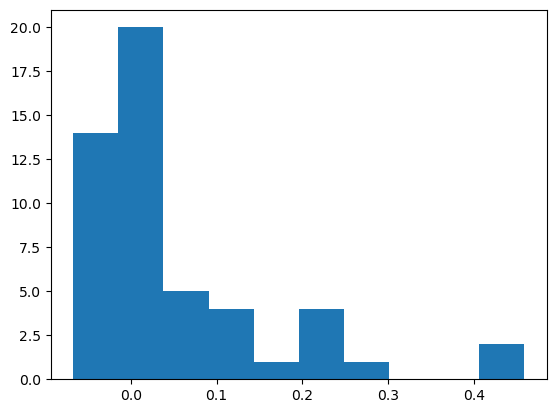

In [112]:
# Bias_C : Clinton 후보의 예측오차
se_clinton = np.array(CL["Prediction"] - CL["Real"])
plt.hist(se_clinton)


##### 2) Trump

(array([ 1.,  1.,  0.,  2.,  3.,  1.,  5.,  2., 16., 20.]),
 array([-0.538465918821716, -0.48695547645845016, -0.43544503409518437,
        -0.3839345917319185, -0.3324241493686527, -0.28091370700538687,
        -0.22940326464212102, -0.17789282227885522, -0.12638237991558937,
        -0.07487193755232352, -0.023361495189057724], dtype=object),
 <BarContainer object of 10 artists>)

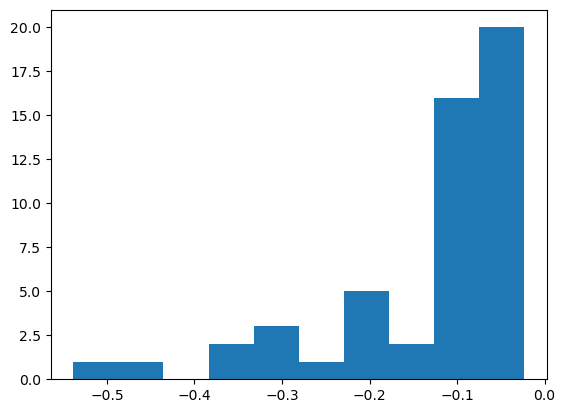

In [113]:
# Bias_T : Trump 후보의 예측오차
se_trump = np.array(TR["Prediction"] - TR["Real"])
plt.hist(se_trump)

#### **1-6.** ‘CL’과 ‘TR’에 각각 표준오차를 담은 ‘SE’라는 열(column)을 추가하시오.

In [114]:
def se(df):
    p = df["Prediction"]
    n = df["Sample_size"]
    q = 1-p
    df["SE"] = p*q/(n)**(1/2)

se(CL)
se(TR)
CL, TR

(             State      Real  Prediction  Sample_size        SE
 0          alabama  0.345538        0.36       1131.0  0.006851
 1           alaska  0.377176        0.31        409.0  0.010577
 2          arizona  0.453871        0.41        392.0  0.012218
 3         arkansas  0.337643        0.32        930.0  0.007135
 4       california  0.327598        0.54        401.0  0.012405
 5         colorado  0.443593        0.43       2777.0  0.004651
 6      connecticut   0.41161        0.52       1387.0  0.006702
 7               dc  0.419226        0.85        310.0  0.007242
 8         delaware  0.041221        0.50        367.0  0.013050
 9          florida  0.477881        0.46        884.0  0.008355
 10         georgia  0.455955        0.46       1200.0  0.007171
 11          hawaii  0.300391        0.52        426.0  0.012093
 12           idaho  0.275599        0.29        612.0  0.008323
 13        illinois  0.394133        0.52       1823.0  0.005846
 14         indiana  0.37

#### **1-7.** ‘CL’과 ‘TR’에 각각 근사신뢰구간(approximate confidence interval)의 하한과 상한을 나타내는 열(column) ‘lower’과 ‘upper’를 추가하시오(유의수준 5%).

In [94]:
# 분위수값 구하는 방법
from scipy.stats import norm
Z = norm(loc = 0, scale = 1) # 표준정규분포를 따르는 확률변수 만들기
Z.ppf(0.975)

1.959963984540054

In [115]:
# 답안을 작성해주세요!
def interval(df):
    standard_error = df["SE"]
    alpha = Z.ppf(0.975)
    p = df["Prediction"]
    upper = p + alpha * standard_error
    lower = p - alpha * standard_error
    df["lower"] = lower
    df["upper"] = upper

interval(CL)
interval(TR)
CL.head(10)
    

,State,Real,Prediction,Sample_size,SE,lower,upper
0,alabama,0.345538,0.36,1131.0,0.006851,0.346572,0.373428
1,alaska,0.377176,0.31,409.0,0.010577,0.289270,0.330730
2,arizona,0.453871,0.41,392.0,0.012218,0.386054,0.433946
3,arkansas,0.337643,0.32,930.0,0.007135,0.306015,0.333985
4,california,0.327598,0.54,401.0,0.012405,0.515688,0.564312
5,colorado,0.443593,0.43,2777.0,0.004651,0.420884,0.439116
6,connecticut,0.41161,0.52,1387.0,0.006702,0.506864,0.533136
7,dc,0.419226,0.85,310.0,0.007242,0.835807,0.864193
8,delaware,0.041221,0.50,367.0,0.013050,0.474423,0.525577
9,florida,0.477881,0.46,884.0,0.008355,0.443625,0.476375


#### **1-8.** 클린턴 후보와 트럼프 후보 각각의 여론조사 신뢰수준을 구하시오.

##### 1) Clinton

In [122]:
CL ["is in interval"] = (CL["lower"] < CL["Real"]) & (CL["Real"] < CL["upper"]) 
CL.replace({False : 0, True : 1})


,State,Real,Prediction,Sample_size,SE,lower,upper,is in interval
0,alabama,0.345538,0.36,1131.0,0.006851,0.346572,0.373428,0
1,alaska,0.377176,0.31,409.0,0.010577,0.289270,0.330730,0
2,arizona,0.453871,0.41,392.0,0.012218,0.386054,0.433946,0
3,arkansas,0.337643,0.32,930.0,0.007135,0.306015,0.333985,0
4,california,0.327598,0.54,401.0,0.012405,0.515688,0.564312,0
5,colorado,0.443593,0.43,2777.0,0.004651,0.420884,0.439116,0
6,connecticut,0.411610,0.52,1387.0,0.006702,0.506864,0.533136,0
7,dc,0.419226,0.85,310.0,0.007242,0.835807,0.864193,0
8,delaware,0.041221,0.50,367.0,0.013050,0.474423,0.525577,0
9,florida,0.477881,0.46,884.0,0.008355,0.443625,0.476375,0


In [124]:
confidence = np.sum(CL["is in interval"]/len(CL))
print(f"confidence of poll survey for Clinton : {confidence}")

confidence of poll survey for Clinton : 0.23529411764705882


##### 2) Trump

In [127]:
# 답안을 작성해주세요!
TR["is in interval"] = (TR["lower"] < TR["Real"]) & (TR["Real"] < TR["upper"]) 
TR.replace({False : 0, True : 1})

confidence = np.sum(TR["is in interval"]/len(TR))
print(f"confidence of poll survey for Trump : {confidence}")

confidence of poll survey for Trump : 0.0


In [128]:
TR

,State,Real,Prediction,Sample_size,SE,lower,upper,is in interval
0,alabama,0.628884,0.55,1131.0,0.007359,0.535576,0.564424,False
1,alaska,0.528878,0.48,409.0,0.012342,0.455810,0.504190,False
2,arizona,0.495031,0.43,392.0,0.012379,0.405737,0.454263,False
3,arkansas,0.604363,0.56,930.0,0.008080,0.544164,0.575836,False
4,california,0.615885,0.32,401.0,0.010866,0.298702,0.341298,False
5,colorado,0.472746,0.40,2777.0,0.004554,0.391074,0.408926,False
6,connecticut,0.544755,0.36,1387.0,0.006186,0.347875,0.372125,False
7,dc,0.53355,0.07,310.0,0.003697,0.062753,0.077247,False
8,delaware,0.928466,0.39,367.0,0.012418,0.365661,0.414339,False
9,florida,0.49064,0.46,884.0,0.008355,0.443625,0.476375,False


#### **1-9.** ✎ 왜 이런 결과가 나왔다고 생각하십니까? 개인의 생각을 자유롭게 서술하시오.
참고 : https://www.vox.com/policy-and-politics/2020/11/10/21551766/election-polls-results-wrong-david-shor


*답안:* 당시 허핑턴 포스트였던 Natalie Jackson이 트럼프 당선 이후 작성한 기사를 참고했습니다. 

그녀는 모델 자체는 충분히 검증되었으나, 거기에 들어간 데이터의 편향이 잘못된 예측 결과를 낳았을 가능성을 제기했습니다. 

유선전화 서비스가 비쌌던 시절, 유선전화를 구입할 수 있는 가정이 공화당 후보를 고른 편향을 배제하지 못한 유명한 예처럼, 이번에는 유선전화를 통한 출구조사를 포함시키지 않은 것이 population 선택에 있어 악수였다는 가능성을 제기했습니다. 즉, 다른 매체들도 대체로 Clinton의 승리를 예측했으나, 유선전화를 통한 출구조사 결과를 포함했기에 HuffPost만큼 틀리지는 않았다는 가능성을 제기했습니다. 

또한 출구조사 이외의 feature, 예를 들어 economic growth index, 여당 순환주기 등의 feature를 포함한 모델을 이용한 경우 더 나은 결과를 보인 것을 들어, 출구조사만 이용했던 Huff Post 모델의 취약점을 인정했습니다. 

요약하면, 사용된 모델은 통계학적으로 검증되었으나 잘못된 feature selection과 population selection으로 정확한 예측을 수행하지 못했다고 분석할 수 있습니다. 